In [1]:
from multihist import Hist1d, Histdd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import importlib

import sys
sys.path.append('/home/kazama/dali/xenonnt/software/nton')

import strax
import straxen
import cutax

straxen.print_versions(('strax', 'straxen', 'cutax', 'nton'))

from cutax.cut_efficiency import CutAcceptance

/opt/XENONnT/anaconda/envs/XENONnT_2022.05.2/lib/python3.8/site-packages/paramiko-2.10.4-py3.8.egg/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [2]:
st = cutax.xenonnt_v8()

In [3]:
#df_Rn = pd.read_pickle("/home/kazama/dali/xenonnt/analysis/check_unblind_data/make_df_Rn220/all_data/Rn220_20220502_cutax_110.pkl")
#df_Rn = df_Rn[df_Rn["cs1"] < 300]
#df_Rn = df_Rn[df_Rn["cs2"] < 10000]

In [4]:
df_Ar = pd.read_pickle("/home/kazama/dali/xenonnt/analysis/check_unblind_data/make_df_Ar37/all_data/Ar37_20220502_cutax_110.pkl")
df_Ar = df_Ar[df_Ar["cs1"] < 100]
df_Ar = df_Ar[df_Ar["cs2"] < 5000]

In [7]:
df_Ar2 = df_Ar.sample(n=1000000)

In [8]:
cut_list_wimp=['cut_interaction_exists',
          'cut_main_is_valid_triggering_peak',
          'cut_daq_veto',
          'cut_run_boundaries',
          'cut_fiducial_volume',
          'cut_s1_tightcoin_3fold',
          'cut_s1_area_fraction_top',
          'cut_cs2_area_fraction_top',
          'cut_s1_max_pmt',
          'cut_s1_single_scatter',
          'cut_s2_single_scatter',
          'cut_s1_pattern_top',
          'cut_s1_pattern_bottom',
          'cut_s2_pattern',
          'cut_s1_width',
          'cut_s2_recon_pos_diff',
          'cut_ambience', 
          'cut_time_veto', 
          'cut_time_shadow', 
          'cut_position_shadow',
          'cut_s1_naive_bayes', 
          'cut_s2_naive_bayes',
         ]


cut_list_low_er=['cut_interaction_exists',
          'cut_main_is_valid_triggering_peak',
          'cut_daq_veto',
          'cut_run_boundaries',
          'cut_fiducial_volume',
          'cut_s1_tightcoin_3fold',
          'cut_s1_area_fraction_top',
          'cut_cs2_area_fraction_top',
          'cut_s1_max_pmt',
          'cut_s1_single_scatter',
          'cut_s2_single_scatter',
          'cut_s1_pattern_top',
          'cut_s1_pattern_bottom',
          'cut_s2_pattern',
          'cut_s1_width',
          'cut_s2_recon_pos_diff',
          'cut_ambience', 
          'cut_time_veto', 
          'cut_time_shadow', 
          'cut_position_shadow',
          'cut_s1_naive_bayes', 
          'cut_s2_naive_bayes',
         ]

In [9]:
prior_cuts=['cut_interaction_exists',
            'cut_main_is_valid_triggering_peak',
            'cut_daq_veto',
            'cut_run_boundaries',
            'cut_fiducial_volume',
            'cut_s1_tightcoin_3fold',]

ca = CutAcceptance(df_Ar2, prior_cuts=prior_cuts, cut_list=cut_list_wimp)

In [10]:
df_cut_stats = ca.make_cut_statistics(cut_list_wimp)

df_cut_stats

,Events (accumulated),Events rate [Hz] (accumulated),Events,Events (fraction),Events rate [Hz],Events (N-1),Events (fraction) (N-1),Events rate (N-1) [Hz]
cut_interaction_exists,1000000.0,1.325442,1000000.0,1.000000,1.325442,578351.0,0.578351,0.766571
cut_main_is_valid_triggering_peak,999985.0,1.325422,999985.0,0.999985,1.325422,578351.0,0.578351,0.766571
cut_daq_veto,999896.0,1.325304,999911.0,0.999911,1.325324,578361.0,0.578361,0.766584
cut_run_boundaries,999188.0,1.324365,999292.0,0.999292,1.324503,578791.0,0.578791,0.767154
cut_fiducial_volume,725113.0,0.961095,725716.0,0.725716,0.961894,756835.0,0.756835,1.003141
cut_s1_tightcoin_3fold,714994.0,0.947683,981967.0,0.981967,1.301540,584622.0,0.584622,0.774882
cut_s1_area_fraction_top,707468.0,0.937708,985237.0,0.985237,1.305874,581287.0,0.581287,0.770462
cut_cs2_area_fraction_top,706109.0,0.935906,988088.0,0.988088,1.309653,579031.0,0.579031,0.767472
cut_s1_max_pmt,703766.0,0.932801,991300.0,0.991300,1.313910,579276.0,0.579276,0.767797
cut_s1_single_scatter,681487.0,0.903271,951530.0,0.951530,1.261198,582236.0,0.582236,0.771720


/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:327: RuntimeWarning: invalid value encountered in true_divide
  mulit_hist1.histogram /= mulit_hist2.histogram
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:349: RuntimeWarning: invalid value encountered in true_divide
  plt.step(x_edges[:-1], pro_axis0_hist1/pro_axis0_hist2, color='gray')
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:357: RuntimeWarning: invalid value encountered in true_divide
  plt.step(pro_axis1_hist1/pro_axis1_hist2, y_edges[:-1], color='gray')


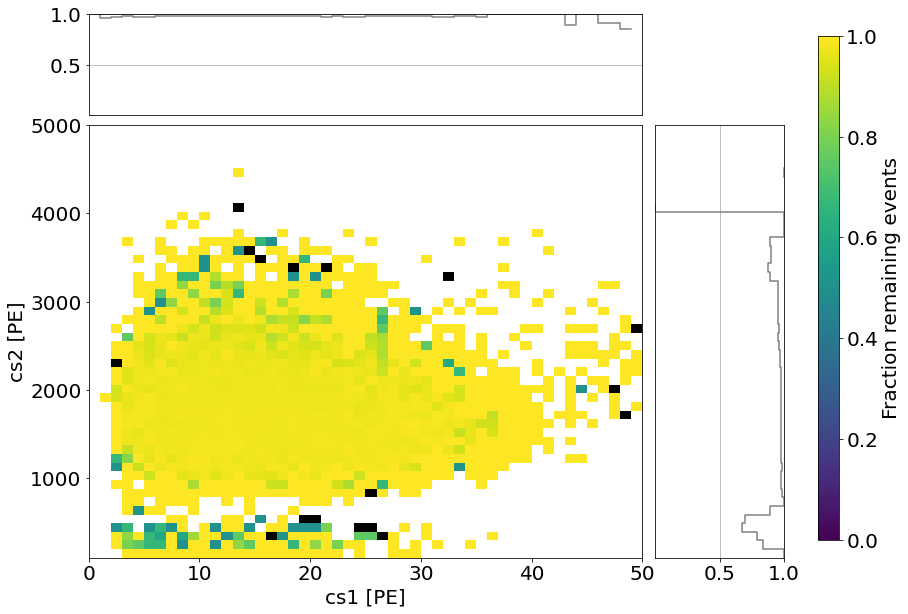

In [15]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rc('font', size='20') 

fig = ca.plot_cut_acceptance_2d_hist_n_minus_one('cs1', 
                                                 'cs2', 
                                                 'cut_s2_width_wire_modeled_wimps', 
                                                 xlabel='cs1 [PE]', ylabel='cs2 [PE]', 
                                                 range=((0, 50),(100, 5000)),
                                                 bins=50
                                                )


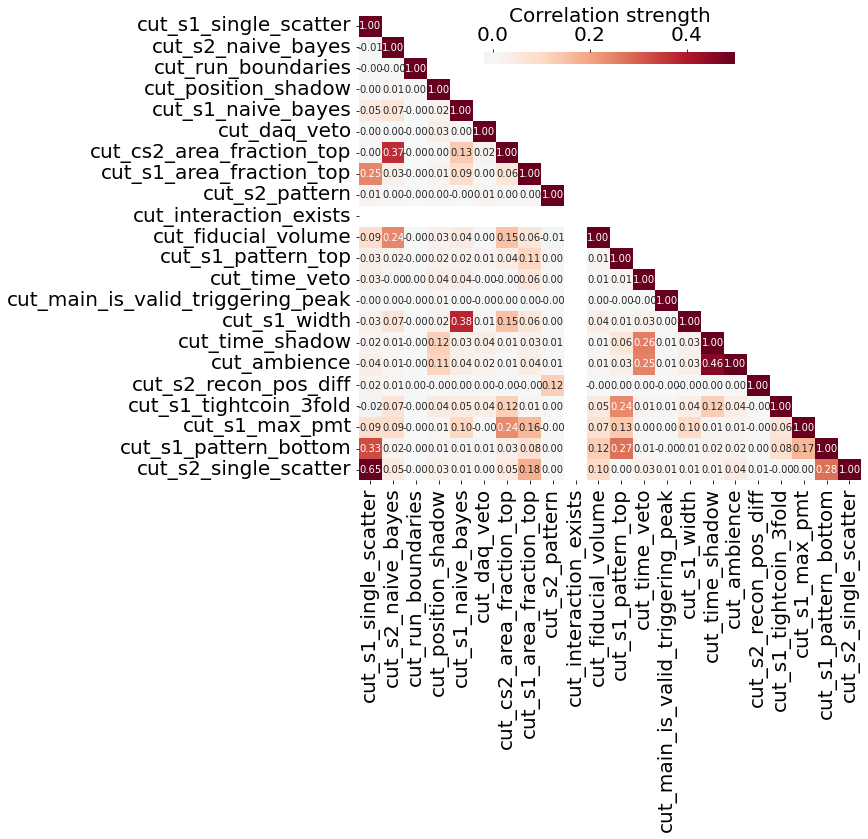

In [22]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.rc('font', size='20') 
corr = ca.get_correlation_matrix()
fig = ca.plot_correlation_matrix(corr)

In [17]:
acceptance = ca.compute_cut_acceptance('cut_s2_width_wire_modeled_wimps',
                                       slice_in='cs2',
                                       bins=np.logspace(2, 4, 100)
                                      )
#acceptance

/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:129: UserWarning: Acceptance not defined for k == n == 0 or k > n. Retunrning nans instead.
  warnings.warn('Acceptance not defined for k == n == 0 or k > n. '
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:475: RuntimeWarning: invalid value encountered in long_scalars
  res_i['acceptance'] = (k/n)
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:129: UserWarning: Acceptance not defined for k == n == 0 or k > n. Retunrning nans instead.
  warnings.warn('Acceptance not defined for k == n == 0 or k > n. '
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:475: RuntimeWarning: invalid value encountered in long_scalars
  res_i['acceptance'] = (k/n)


(200.0, 3000.0)

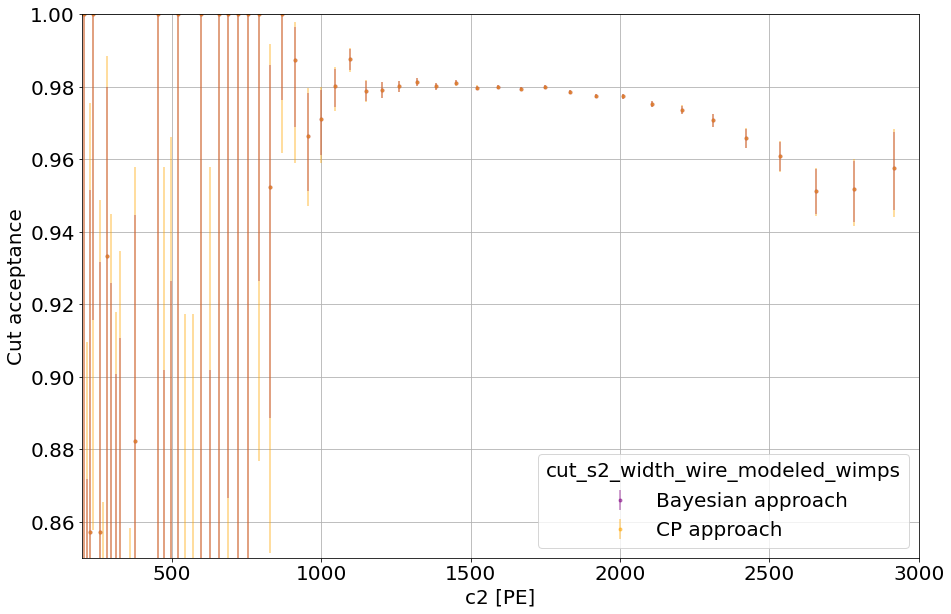

In [19]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rc('font', size='20') 

fig = ca.plot_cut_acceptance(acceptance, 'cut_s2_width_wire_modeled_wimps', 'c2 [PE]')
plt.ylim(0.85, 1.0)
plt.xlim(200, 3000)

In [20]:
acceptance = ca.compute_cut_acceptance('cut_s2_width_wire_modeled_low_er',
                                       slice_in='cs2',
                                       bins=np.logspace(2, 4, 100)
                                      )
#acceptance

/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:129: UserWarning: Acceptance not defined for k == n == 0 or k > n. Retunrning nans instead.
  warnings.warn('Acceptance not defined for k == n == 0 or k > n. '
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:475: RuntimeWarning: invalid value encountered in long_scalars
  res_i['acceptance'] = (k/n)
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:129: UserWarning: Acceptance not defined for k == n == 0 or k > n. Retunrning nans instead.
  warnings.warn('Acceptance not defined for k == n == 0 or k > n. '
/dali/lgrandi/kazama/xenonnt/software/cutax/cutax/cut_efficiency.py:475: RuntimeWarning: invalid value encountered in long_scalars
  res_i['acceptance'] = (k/n)


(200.0, 3000.0)

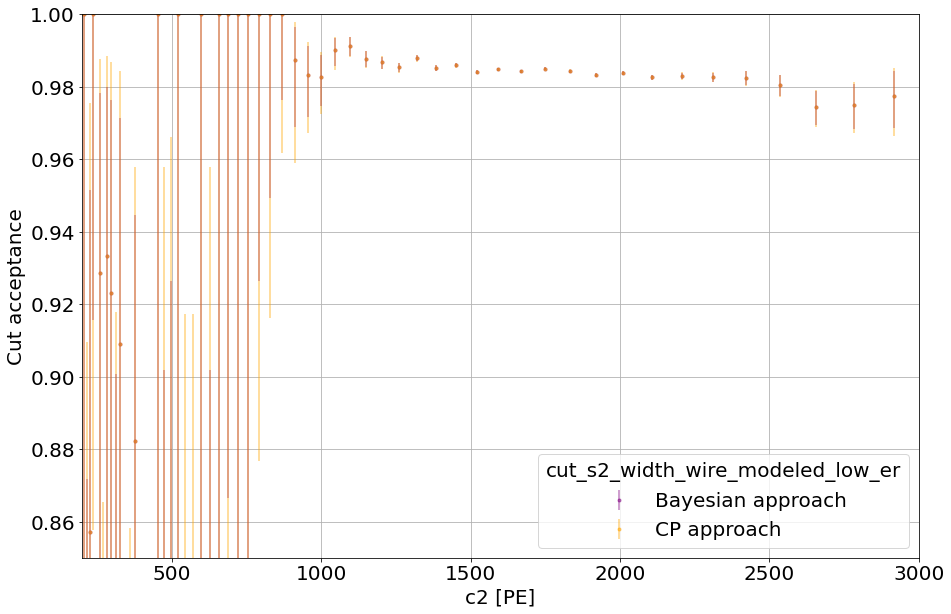

In [21]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rc('font', size='20') 

fig = ca.plot_cut_acceptance(acceptance, 'cut_s2_width_wire_modeled_low_er', 'c2 [PE]')
plt.ylim(0.85, 1.0)
plt.xlim(200, 3000)